# Read the gene expression input file

In [3]:
import pandas as pd
df = pd.read_csv("../raw_data/FIRE3_final_df.txt",sep=' ')

In [4]:
df.columns

Index(['entrezid', 'gsymbol', '1', '4', '5', '9', '10', '11', '12', '15',
       ...
       '838', '840', '842', '843', '889', '892', '896', '897', '899', '900'],
      dtype='object', length=453)

## drop entrezid

In [5]:
df = df.drop(columns=['entrezid'])
df.columns
df.shape

(23561, 452)

In [6]:
df.to_csv("../raw_data/dataset.txt", header=None, index=None, sep='\t')

In [7]:
df_test= pd.read_csv("../raw_data/dataset.txt",sep='\t')

In [8]:
df_test.columns

Index(['A1BG-AS1', '6.073786425', '4.856429604', '4.25874843', '4.85063519',
       '4.670916181', '6.680078675', '7.299947282', '6.021905273',
       '5.962185663',
       ...
       '5.24959828', '6.113905357', '6.336825131', '5.804862948',
       '5.206532783', '5.251891422', '6.38220514', '4.889634195',
       '6.272590601', '5.233232602'],
      dtype='object', length=452)

In [9]:
df.shape

(23561, 452)

## read-in the clinical data

In [10]:
!pip install pyreadstat

In [11]:
import pyreadstat

clinical_df, meta = pyreadstat.read_sav("../raw_data/FIRE3_Heike_set_new.sav")

In [12]:
clinical_df.shape

(735, 37)

In [13]:
clinical_df.columns

Index(['study', 'pat_nr', 'CET1_REST0', 'arm', 'sex', 'age', 'ecog',
       'skin_rash', 'MOL_SG', 'RNA_Probe', 'predictedCMS', 'nearestCMS',
       'detaiL_primloc', 'primeloc_side', 'liver', 'lung', 'LKMETS',
       'PERITONEAL', 'other', 'liver_only', 'no_organs', 'secresec', 'pfs',
       'pfs_time_mo', 'os', 'os_time_mo', 'bor1', 'orr1', 'dpr1', 'ets_cat',
       'SYNCH_META', 'PRIMARY_RES', 'RADIOVORHER', 'LK', 'AP', 'CTX_ADJ',
       'filter_$'],
      dtype='object')

## plot the data set of two study arms and the skin rash

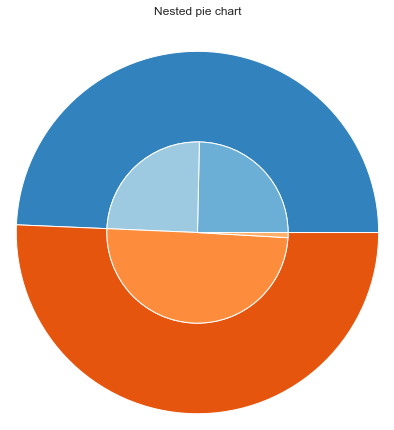

In [182]:
from matplotlib import pyplot as plt 
import numpy as np 
  
  
size = 2
cars = ['Cetuximab', 'Bevacizumab'] 
  
data = np.array([[109, 109],[220, 4]]) 
  
norm = data / np.sum(data)*2 * np.pi 
  
left = np.cumsum(np.append(0,  
                           norm.flatten()[:-1])).reshape(data.shape) 
  
cmap = plt.get_cmap("tab20c") 
outer_colors = cmap(np.arange(6)*4) 
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 
                              10, 12, 13, 15, 
                              17, 18, 20 ])) 

  
fig, ax = plt.subplots(figsize =(10, 7), 
                       subplot_kw = dict(polar = True)) 
  
ax.bar(x = left[:, 0], 
       width = norm.sum(axis = 1), 
       bottom = 1-size, 
       height = size, 
       color = outer_colors,  
       edgecolor ='w', 
       linewidth = 1, 
       align ="edge") 
  
ax.bar(x = left.flatten(), 
       width = norm.flatten(), 
       bottom = 1-2 * size, 
       height = size, 
       color = inner_colors, 
       edgecolor ='w', 
       linewidth = 1, 
       align ="edge") 
  
ax.set(title ="Nested pie chart") 
ax.set_axis_off() 
  
plt.show() 

## read-in the results data of immune cell abundances

In [14]:
immune_df = pd.read_csv("../raw_data/CIBERSORTx_Job7_Results.txt",sep='\t')

In [15]:
immune_df

,Mixture,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),...,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,P-value,Correlation,RMSE
0,1,0.040607,0.0,0.209086,0.122856,0.0,0.088533,0.000000,0.111784,0.052571,...,0.136607,0.000000,0.008096,0.000000,0.045574,0.0,0.119292,0.024,0.167135,1.012925
1,4,0.049146,0.0,0.121825,0.076978,0.0,0.153331,0.051057,0.068564,0.059623,...,0.142035,0.003342,0.000000,0.000000,0.171013,0.0,0.022019,0.030,0.161424,1.018143
2,5,0.003186,0.0,0.162668,0.042196,0.0,0.240454,0.000000,0.000000,0.018316,...,0.066831,0.000000,0.000000,0.000000,0.140387,0.0,0.111967,0.048,0.148986,1.029813
3,9,0.067346,0.0,0.097330,0.072327,0.0,0.168887,0.000000,0.002431,0.067972,...,0.019745,0.071104,0.000000,0.000000,0.188876,0.0,0.074924,0.004,0.250437,0.986058
4,10,0.000000,0.0,0.105039,0.066233,0.0,0.249715,0.074691,0.035303,0.085112,...,0.065631,0.000000,0.009239,0.000000,0.134230,0.0,0.070198,0.024,0.169331,1.020998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,892,0.043449,0.0,0.207009,0.076357,0.0,0.131035,0.000000,0.057483,0.062189,...,0.032529,0.000000,0.016312,0.000000,0.156577,0.0,0.032484,0.042,0.151614,1.028743
447,896,0.062652,0.0,0.107508,0.074588,0.0,0.188766,0.000000,0.025771,0.034555,...,0.323832,0.000000,0.018100,0.079479,0.029838,0.0,0.042074,0.020,0.190746,1.002109
448,897,0.026637,0.0,0.043241,0.084113,0.0,0.310961,0.000000,0.000000,0.067556,...,0.155993,0.025977,0.008951,0.078316,0.000000,0.0,0.084467,0.020,0.189712,1.009547
449,899,0.025019,0.0,0.072969,0.102613,0.0,0.253290,0.000000,0.025284,0.020920,...,0.148717,0.039251,0.012510,0.177687,0.000000,0.0,0.070445,0.004,0.254099,0.977768


## merge clinical data and immune cell abundances

In [22]:
clinical_df["pat_nr"]=clinical_df["pat_nr"].astype('int64')
immune_df = immune_df.rename({'Mixture': 'pat_nr'}, axis='columns')
immune_clinical=immune_df.merge(clinical_df, how='inner', on='pat_nr')

In [17]:
immune_clinical.head()

,pat_nr,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),...,orr1,dpr1,ets_cat,SYNCH_META,PRIMARY_RES,RADIOVORHER,LK,AP,CTX_ADJ,filter_$
0,1,0.040607,0.0,0.209086,0.122856,0.0,0.088533,0.000000,0.111784,0.052571,...,1.0,NaN,NaN,2.0,1.0,1.0,2.0,1.0,1.0,1.0
1,4,0.049146,0.0,0.121825,0.076978,0.0,0.153331,0.051057,0.068564,0.059623,...,1.0,NaN,0.0,1.0,1.0,0.0,2.0,2.0,0.0,1.0
2,5,0.003186,0.0,0.162668,0.042196,0.0,0.240454,0.000000,0.000000,0.018316,...,1.0,NaN,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
3,9,0.067346,0.0,0.097330,0.072327,0.0,0.168887,0.000000,0.002431,0.067972,...,1.0,NaN,1.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0
4,10,0.000000,0.0,0.105039,0.066233,0.0,0.249715,0.074691,0.035303,0.085112,...,0.0,NaN,1.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0


In [18]:
immune_clinical.shape

(442, 62)

In [212]:
import pandas as pd
immune_clinical = pd.read_csv("../raw_data/immune_clinical.csv")

# data exploration

## scatter plots of different immune cells against each other

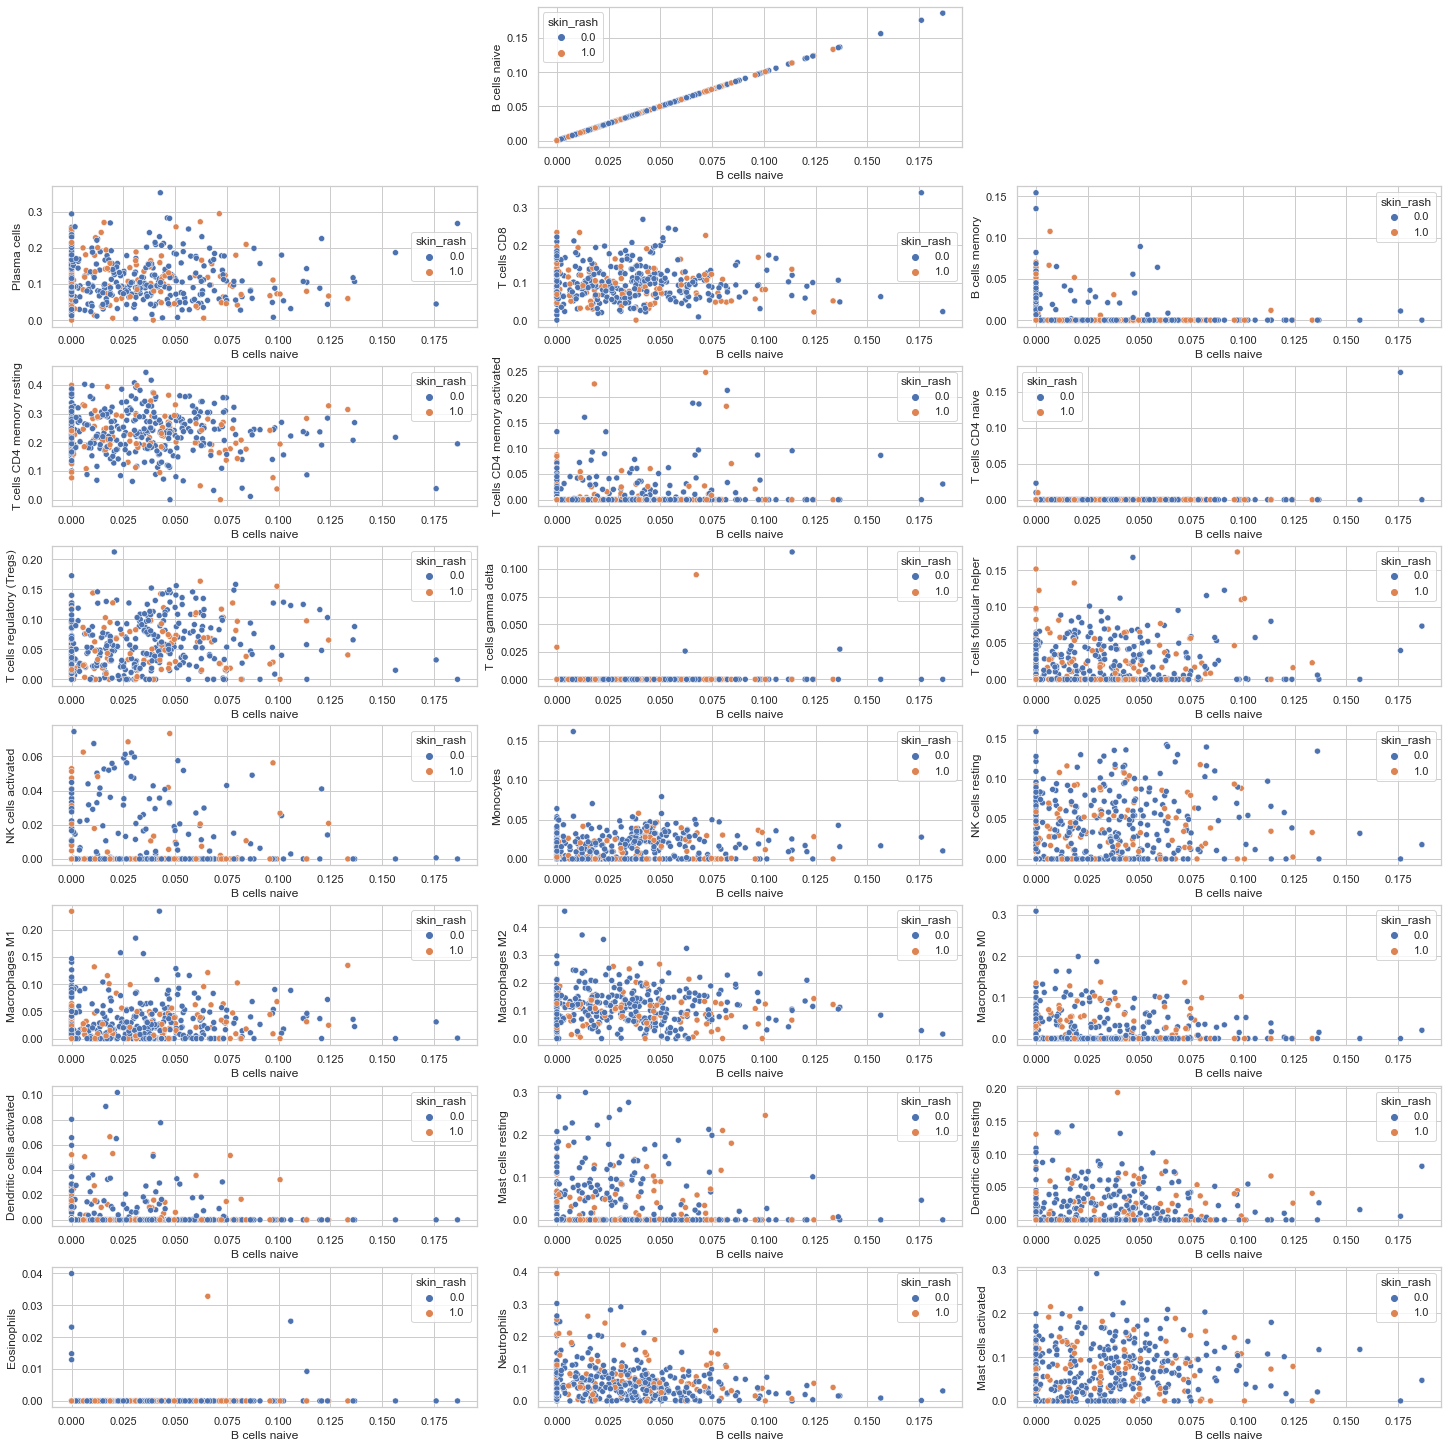

In [198]:
import seaborn as sns
from matplotlib.gridspec import GridSpec

#sns.scatterplot(data=cdf, x=cdf.iloc[:,1], y=cdf.iloc[:,20],hue="skin_rash")

fig = plt.figure(constrained_layout=True,figsize =(20, 20))

gs = GridSpec(ncols=3, nrows=8, figure=fig)

for i in range(1,23):
    #ax = fig.add_subplot(gs[round(i/3),i%3])
    sns.scatterplot(data=cdf, x=cdf.iloc[:,1], y=cdf.iloc[:,i],hue="skin_rash",\
                    ax=fig.add_subplot(gs[round(i/3),i%3]))
    ax.title.set_text(cdf.iloc[:,i].name);

## how many zeros?

In [172]:
X = cdf.iloc[:,1:23]
X.isin([0.0000]).sum(axis=0)

B cells naive                    92
B cells memory                  358
Plasma cells                      2
T cells CD8                       2
T cells CD4 naive               438
T cells CD4 memory resting        2
T cells CD4 memory activated    321
T cells follicular helper       167
T cells regulatory (Tregs)       42
T cells gamma delta             437
NK cells resting                100
NK cells activated              321
Monocytes                       137
Macrophages M0                  228
Macrophages M1                  104
Macrophages M2                   10
Dendritic cells resting         205
Dendritic cells activated       328
Mast cells resting              273
Mast cells activated             68
Eosinophils                     435
Neutrophils                      21
dtype: int64

# start with clustering analysis

In [25]:
from sklearn.cluster import KMeans

In [128]:
km = KMeans(n_clusters=3)

In [129]:
km.fit(X)

KMeans(n_clusters=3)

In [130]:
km.cluster_centers_.shape

(3, 22)

In [131]:
len(km.labels_)


442

ValueError: 'c' argument has 218 elements, which is inconsistent with 'x' and 'y' with size 442.

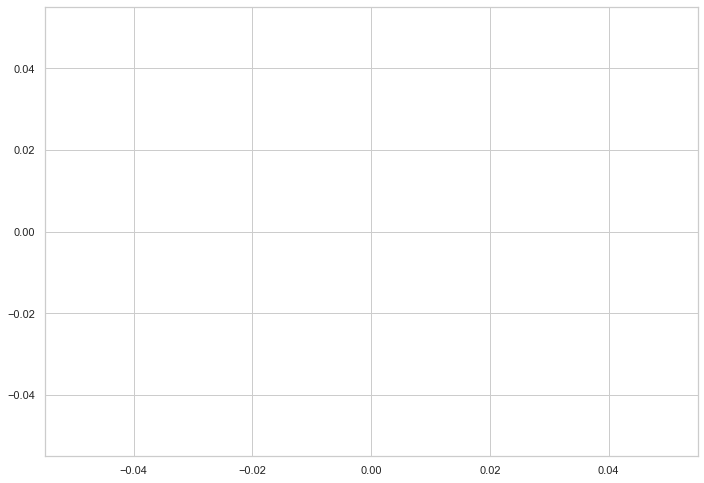

In [188]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
sns.scatterplot(data=X, x=X.iloc[:,2], y=X.iloc[:,18],size=cdf["skin_rash"],\
                style=cdf["skin_rash"],c=km.labels_,sizes=(80,20),palette=("hls", 8));

# group the data into the two study arms

In [189]:
cdf_cetuximab = cdf[cdf.arm == 1]
cdf_bevacizumab = cdf[cdf.arm == 2]

In [190]:
cdf_bevacizumab.shape

(224, 62)

In [94]:
cdf_bevacizumab_rash = cdf_bevacizumab[cdf_bevacizumab.skin_rash == 1]
cdf_cetuximab_rash = cdf_cetuximab[cdf_cetuximab.skin_rash == 1]

# k means clustering

In [135]:
X = cdf_cetuximab.iloc[:,1:23]
km = KMeans(n_clusters=3)
km.fit(X)

KMeans(n_clusters=3)

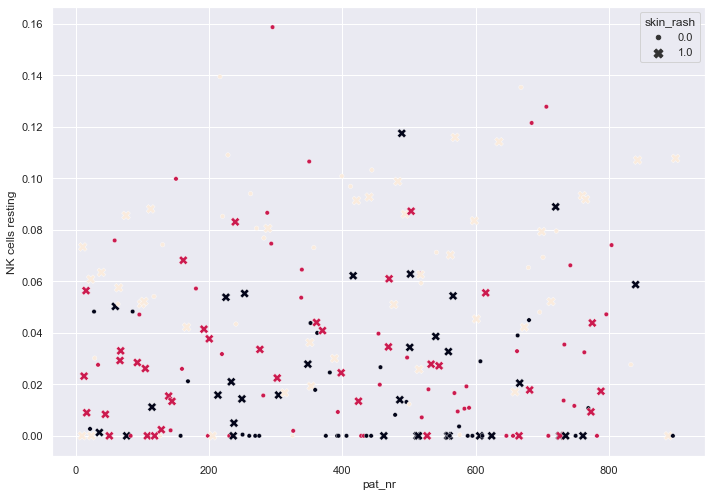

In [146]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=cdf_cetuximab, x=cdf_cetuximab.iloc[:,0], y=cdf_cetuximab.iloc[:,11],\
                size=cdf["skin_rash"],style=cdf["skin_rash"],c=km.labels_,sizes=(80,20));

In [191]:
print(cdf_bevacizumab_rash.shape)
print(cdf_cetuximab_rash.shape)

(4, 62)
(109, 62)


# plot histograms and boxplots of the immune cell abundances

In [195]:
cdf.shape

(442, 62)

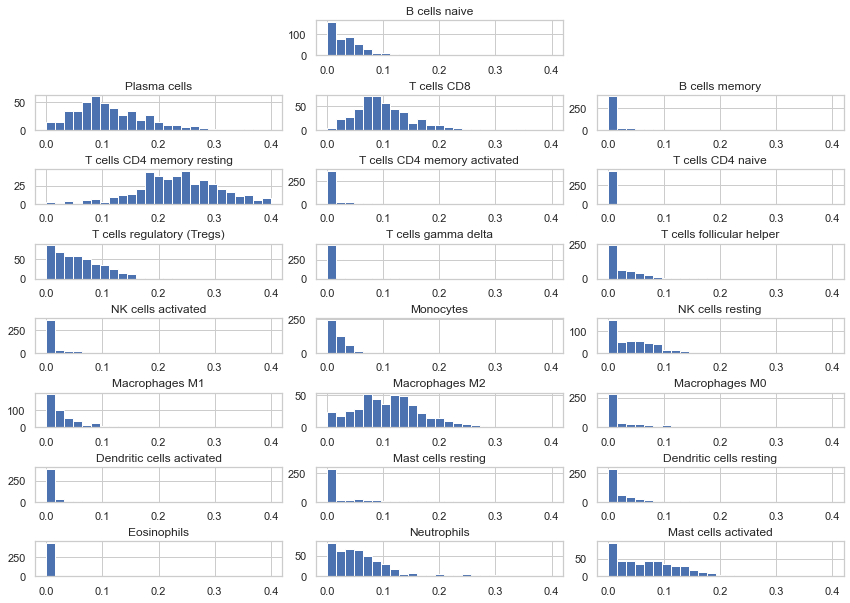

In [196]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(constrained_layout=True)

gs = GridSpec(ncols=3, nrows=8, figure=fig)

for i in range(1,23):
    ax = fig.add_subplot(gs[round(i/3),i%3])
    ax.hist(cdf.iloc[:, i], bins = 25, range=(0,0.4))
    ax.title.set_text(cdf.iloc[:,i].name)

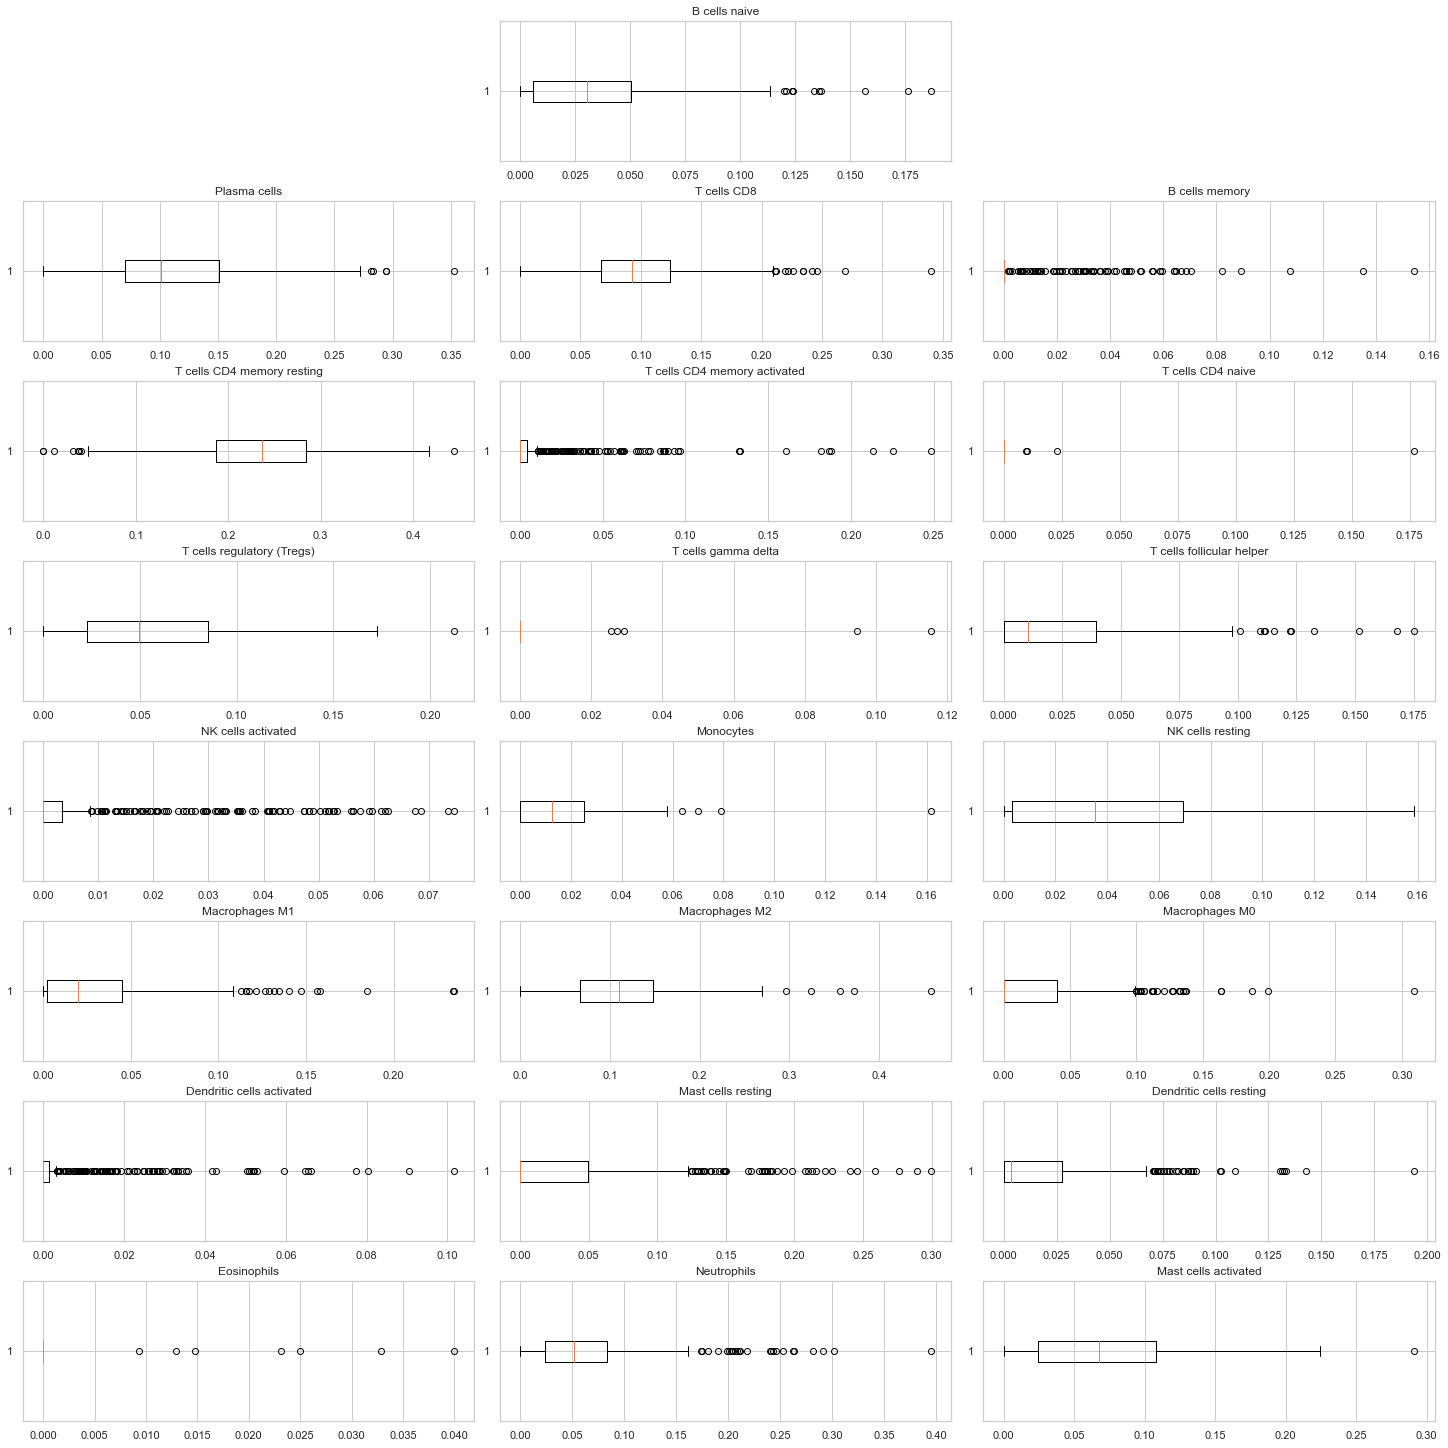

In [197]:
fig = plt.figure(constrained_layout=True,figsize =(20, 20))

gs = GridSpec(ncols=3, nrows=8, figure=fig)

for i in range(1,23):
    ax = fig.add_subplot(gs[round(i/3),i%3])
    ax.boxplot(x = cdf.iloc[:, i], vert=False)
    ax.title.set_text(cdf.iloc[:,i].name)

# PCA

In [277]:
cetux = immune_clinical[immune_clinical["arm"] == 1.0]
cetux.shape

(218, 62)

In [278]:
X = cetux.iloc[:,1:23]

In [279]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns=features)
X

,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Monocytes,Macrophages M0,Macrophages M1,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils
0,1.025411,-0.343705,-0.229827,-0.591112,-0.096223,-0.859374,-0.402126,-0.757977,0.344682,9.142768,...,-0.890156,-0.348337,0.737241,-1.478405,1.842501,-0.434860,-0.603625,2.160106,-0.108081,0.124270
1,-1.053443,-0.343705,-0.105382,-0.725687,-0.096223,0.199197,1.473281,0.269138,0.744993,-0.107140,...,1.241060,-0.677736,-0.831666,-0.695575,-0.672868,0.219551,-0.603625,1.186733,-0.108081,0.045752
2,0.977627,-0.343705,0.110279,0.273048,-0.096223,0.614112,-0.402126,-0.833935,0.381390,-0.107140,...,-0.890156,-0.457505,2.239021,-1.723741,0.204537,-0.434860,-0.603625,0.336452,11.417388,-0.270593
3,-0.737874,-0.343705,1.202641,2.089801,-0.096223,0.635537,-0.402126,-0.833935,2.120576,-0.107140,...,-0.383587,-0.677736,-0.368023,-1.562723,-0.672868,-0.434860,-0.603625,0.247283,-0.108081,-1.045238
4,-1.053443,0.476041,-0.892163,-0.407410,-0.096223,1.341637,-0.402126,0.290390,0.103924,-0.107140,...,-0.890156,-0.371260,-0.831666,1.038779,2.142076,0.289883,-0.603625,-0.395062,-0.108081,0.472811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,-1.053443,-0.343705,1.667144,-0.671935,-0.096223,0.076214,-0.402126,-0.833935,-0.862800,-0.107140,...,-0.734048,0.119230,-0.831666,0.332226,-0.672868,0.644736,0.146232,0.106481,-0.108081,0.729244
214,0.262458,-0.343705,0.768996,-0.233877,-0.096223,-1.828033,-0.402126,1.170764,-0.491197,-0.107140,...,0.989127,0.899749,0.294801,-1.812747,-0.232003,-0.434860,-0.603625,0.884432,-0.108081,1.376206
215,0.885398,-0.343705,0.876434,0.284845,-0.096223,0.107505,-0.402126,-0.833935,-0.880933,-0.107140,...,-0.233244,0.035901,-0.831666,-0.329423,2.451301,-0.434860,-0.603625,1.228922,-0.108081,-0.366821
216,0.880543,-0.343705,-0.065522,-0.541167,-0.096223,-0.599022,-0.402126,-0.028699,-0.435760,-0.107140,...,-0.779839,-0.677736,-0.831666,3.709403,-0.672868,0.847187,0.782719,-0.672729,-0.108081,-0.421443


In [314]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [315]:
W = pca.components_
len(W)

10

In [282]:
features = X.columns
len(features)
features

Index(['B cells naive', 'B cells memory', 'Plasma cells', 'T cells CD8',
       'T cells CD4 naive', 'T cells CD4 memory resting',
       'T cells CD4 memory activated', 'T cells follicular helper',
       'T cells regulatory (Tregs)', 'T cells gamma delta', 'NK cells resting',
       'NK cells activated', 'Monocytes', 'Macrophages M0', 'Macrophages M1',
       'Macrophages M2', 'Dendritic cells resting',
       'Dendritic cells activated', 'Mast cells resting',
       'Mast cells activated', 'Eosinophils', 'Neutrophils'],
      dtype='object')

In [316]:
W = pd.DataFrame(W.T,
                 index=features,
                 columns=[f'PC{i}' for i in range(1,len(W)+1)])
W

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
B cells naive,0.006630,0.283269,0.025297,0.060360,0.473377,-0.233740,-0.075119,0.089415,0.111309,0.078035
B cells memory,0.054846,-0.001874,0.147009,-0.170141,-0.359690,0.226943,0.146503,-0.417523,-0.357024,0.319249
Plasma cells,-0.013013,0.077488,-0.211245,0.532117,-0.188194,0.148382,0.127521,-0.036312,0.062498,0.352513
T cells CD8,0.168660,0.272115,0.210257,0.084375,-0.132378,0.281604,0.076451,-0.133615,0.023291,-0.453694
T cells CD4 naive,-0.065404,-0.139508,-0.046437,0.167367,-0.060487,0.282461,0.357245,-0.161660,0.567606,-0.198903
T cells CD4 memory resting,0.051488,-0.026847,-0.447908,-0.447079,-0.059455,0.194139,-0.026736,0.183735,-0.060431,0.049444
T cells CD4 memory activated,-0.090503,-0.104055,-0.035659,0.327266,0.369292,0.296765,-0.110436,-0.143575,-0.362777,-0.336360
T cells follicular helper,0.194385,-0.060898,0.392265,0.132200,-0.095518,-0.383423,0.074929,-0.162463,-0.113017,-0.108685
T cells regulatory (Tregs),-0.085316,0.471897,0.023900,-0.049561,-0.273447,-0.191036,-0.132252,-0.040596,0.180129,0.103259
T cells gamma delta,-0.046301,0.118357,0.196503,-0.015964,0.378009,0.115705,0.380573,-0.106737,-0.104732,0.374678


<AxesSubplot:>

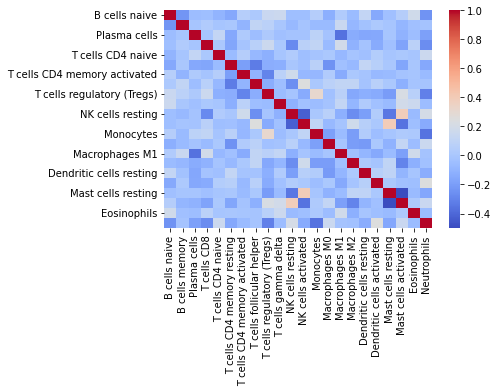

In [305]:
import seaborn as sns
sns.heatmap(pd.DataFrame(X).corr(), cmap='coolwarm')

In [319]:
X_proj = pca.transform(X)
X_proj.shape
X_proj = pd.DataFrame(X_proj, columns=[f'PC{b}' for b in range(1, 11)])
X_proj

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.634508,2.147611,2.200644,-0.883792,4.749042,0.219028,4.221164,-1.403612,-1.031464,3.985036
1,-1.855884,0.360424,-1.035786,0.444169,-0.403037,-0.419516,0.069187,-0.441587,-0.589633,-0.822103
2,-0.626636,3.808938,2.341079,-2.980065,3.165118,3.222400,2.881106,3.585608,2.939689,0.815525
3,-0.888911,2.434732,-0.785233,0.396335,-1.641771,1.204554,0.036266,0.011899,0.172532,-0.180102
4,0.647331,-1.244525,-0.785021,-1.778299,0.122281,-0.430126,0.086230,-1.479189,-0.107816,0.263631
...,...,...,...,...,...,...,...,...,...,...
213,-1.002827,-1.665324,-0.966707,0.753089,-0.603138,0.398164,0.052948,0.328771,0.420944,1.086084
214,-2.388404,0.181402,1.261213,1.241535,-0.557549,-0.979920,0.735997,0.654689,-0.507654,-0.619219
215,-0.013757,0.520204,-1.111838,0.264442,1.260683,-0.557738,0.914178,-0.688153,-0.243068,0.339917
216,1.979541,-1.418182,-0.165531,0.490442,1.053782,-1.030406,-1.637647,-0.965857,1.776736,1.080110


<AxesSubplot:>

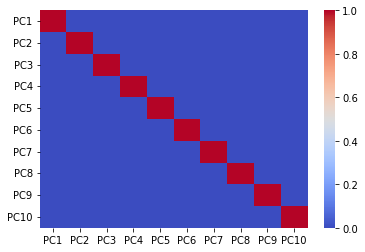

In [320]:
sns.heatmap(pd.DataFrame(X_proj).corr(), cmap='coolwarm')

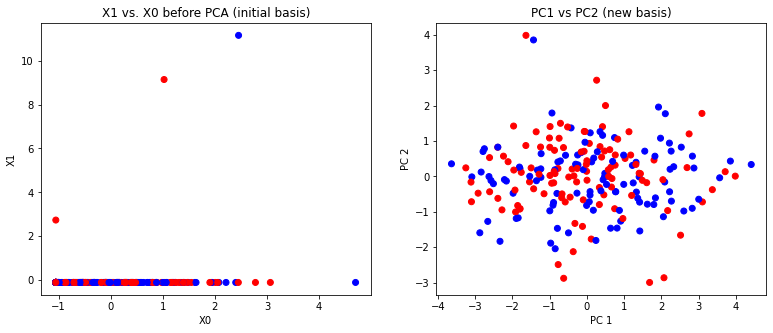

In [322]:
cell_1 = 0
cell_2 = 9
import matplotlib.pyplot as plt
colors = {1.0:'red', 0.0:'blue'}
            
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.title('X1 vs. X0 before PCA (initial basis)'); plt.xlabel('X0'); plt.ylabel('X1')
plt.scatter(X.iloc[:,cell_1], X.iloc[:,cell_2],c=cetux['skin_rash'].map(colors))

plt.subplot(1,2,2)
plt.title('PC1 vs PC2 (new basis)'); plt.xlabel('PC 1'); plt.ylabel('PC 2')
plt.scatter(X_proj.iloc[:,cell_1], X_proj.iloc[:,cell_2],c=cetux['skin_rash'].map(colors));

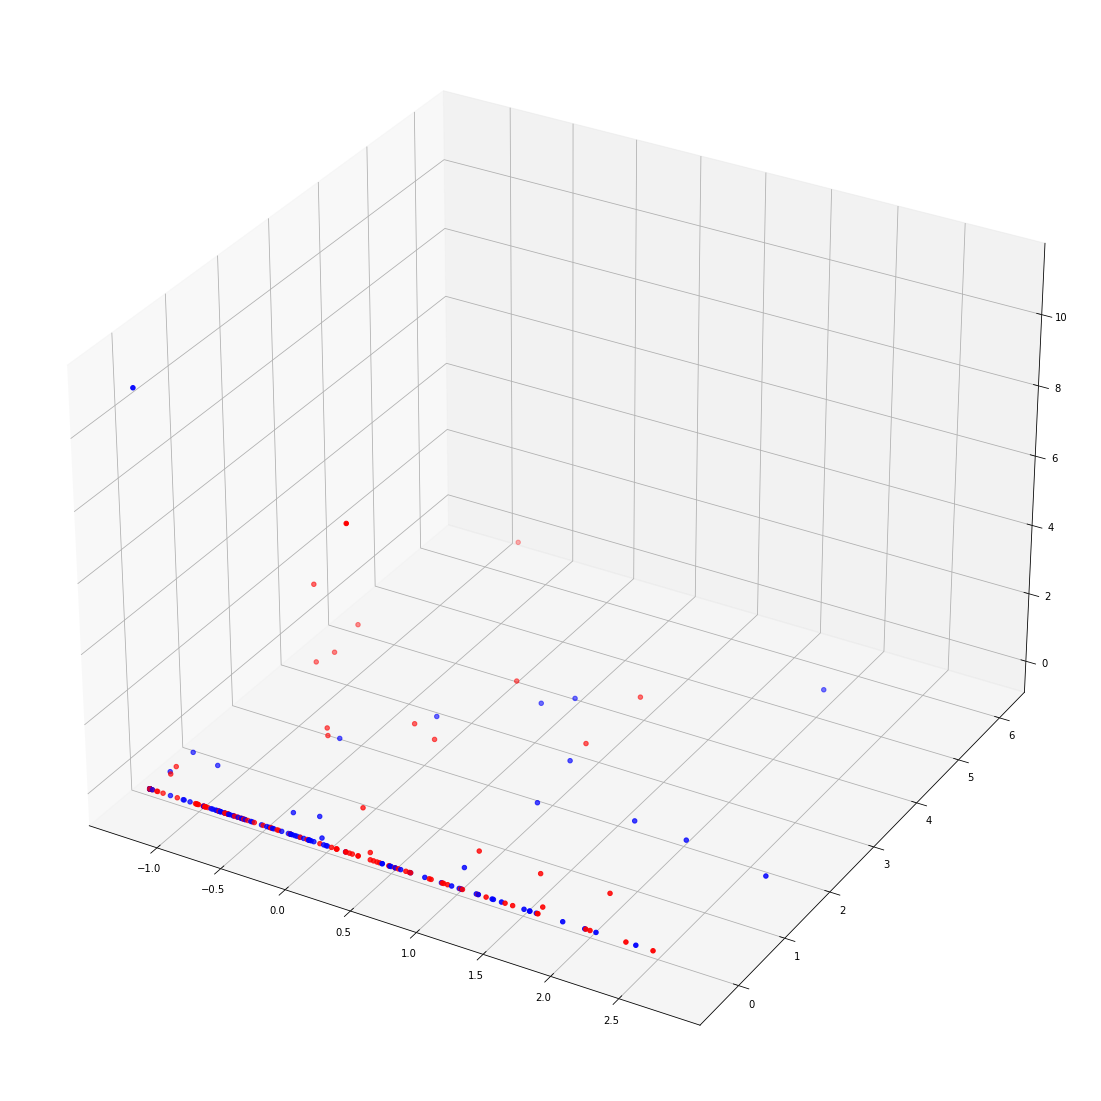

In [347]:
cell_1 = 8
cell_2 = 1
cell_3 = 9
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize =(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.iloc[:,cell_1], X.iloc[:,cell_2], X.iloc[:,cell_3],c=cetux['skin_rash'].map(colors));

In [348]:
X_proj.std()**2 / ((X.std()**2).sum())

PC1     0.122263
PC2     0.099215
PC3     0.078984
PC4     0.072433
PC5     0.070132
PC6     0.056596
PC7     0.051770
PC8     0.047219
PC9     0.045835
PC10    0.044801
dtype: float64

In [349]:
pca.explained_variance_ratio_


array([0.12226286, 0.09921454, 0.07898398, 0.07243341, 0.07013189,
       0.05659561, 0.05177012, 0.04721919, 0.04583486, 0.04480077])

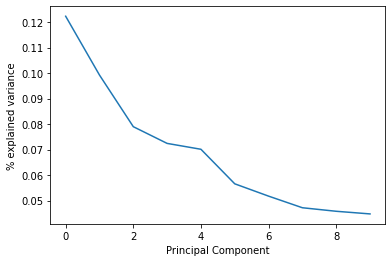

In [350]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component'); plt.ylabel('% explained variance');

In [351]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
km.fit(X_proj)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [352]:
km.cluster_centers_.shape


(2, 10)

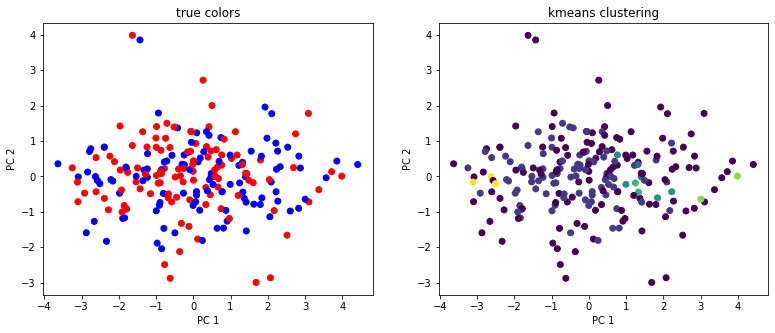

In [392]:
cell_1 = 0
cell_2 = 9
colors = {1.0:'red', 0.0:'blue'}
            
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.title('true colors'); plt.xlabel('PC 1'); plt.ylabel('PC 2')
plt.scatter(X_proj.iloc[:,cell_1], X_proj.iloc[:,cell_2],c=cetux['skin_rash'].map(colors));

plt.subplot(1,2,2)
plt.title('kmeans clustering'); plt.xlabel('PC 1'); plt.ylabel('PC 2')
plt.scatter(X_proj.iloc[:,cell_1], X_proj.iloc[:,cell_2],c=clustering.labels_);

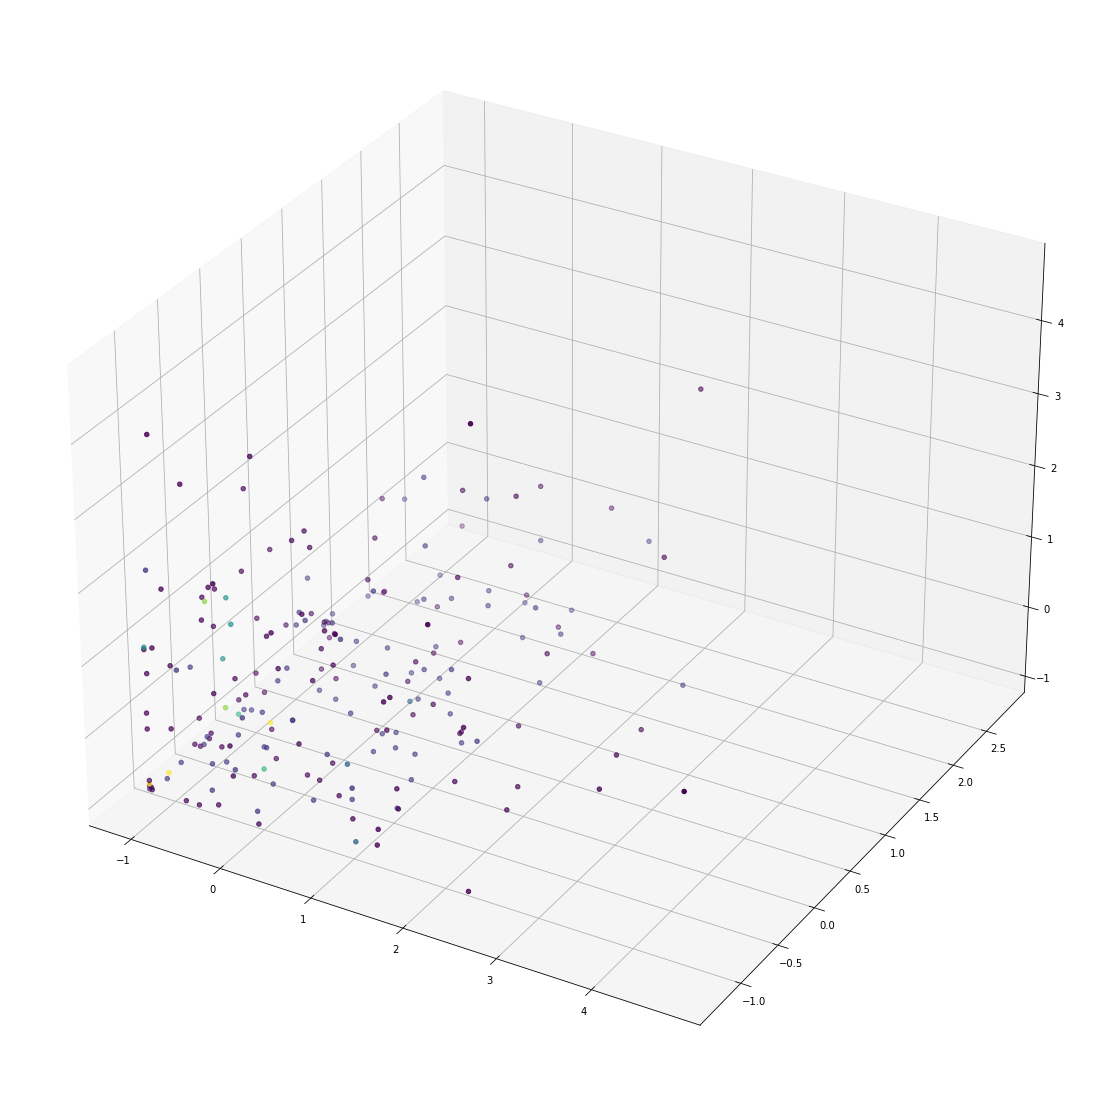

In [386]:
cell_1 = 0
cell_2 = 8
cell_3 = 7
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize =(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.iloc[:,cell_1], X.iloc[:,cell_2], X.iloc[:,cell_3],c=clustering.labels_);

In [380]:
from sklearn.cluster import ward_tree
wt = ward_tree(X,n_clusters=20)

/var/folders/mq/jjlkgbq54s7gdf9qc0n74wqr0000gp/T/ipykernel_84347/2346115448.py:2: UserWarning: Partial build of the tree is implemented only for structured clustering (i.e. with explicit connectivity). The algorithm will build the full tree and only retain the lower branches required for the specified number of clusters
  wt = ward_tree(X,n_clusters=20)


In [381]:
wt


(array([[ 70, 153],
        [ 87, 123],
        [164, 213],
        [ 10, 172],
        [ 63, 121],
        [ 44, 136],
        [ 96, 160],
        [114, 171],
        [175, 182],
        [ 18, 151],
        [110, 200],
        [145, 195],
        [ 26, 116],
        [ 88,  91],
        [ 47, 174],
        [150, 218],
        [ 62, 105],
        [ 72, 158],
        [ 40, 183],
        [ 15,  77],
        [  9, 180],
        [184, 188],
        [ 71, 117],
        [ 28, 100],
        [  5, 139],
        [130, 147],
        [155, 221],
        [219, 225],
        [ 54, 210],
        [196, 226],
        [ 38, 166],
        [ 41,  95],
        [ 69, 134],
        [  6, 138],
        [148, 170],
        [ 27, 103],
        [191, 227],
        [211, 220],
        [ 14, 173],
        [ 16, 106],
        [206, 230],
        [127, 243],
        [ 29, 120],
        [  1, 251],
        [ 86, 257],
        [168, 223],
        [162, 234],
        [101, 197],
        [ 85, 190],
        [128, 238],


In [383]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=3, min_samples=2).fit(X)

In [385]:
len(clustering.labels_)

218